## Round the Sound

This is a general page that will display info about a race day.

In [11]:
# These are libraries written for RaceAnalysis
from global_variables import G
from nbutils import display_markdown, display
import race_logs
import metadata as m
import process as p
import analysis as a
import chart
import utils
import numpy as np
import kwindoo as kw
import pandas as pd

import nbutils

# Initialize for Seattle.
G.init_seattle(logging_level="INFO")

In [6]:
file = "Data/OneOff/2021_RTTS_boat_data.gz"
dfb = pd.read_pickle(file)

dfb


id first_name last_name       boat_name
0   47432      Chris   Hubbard       Charlotte
1   47485    Clemenz   Melanie  Clemenz’s boat
2   43409      Erik   Kristen     More Jubilee
3   45790       John    Bailey       Sir Isaac
4   47490         JP     Price        JP Price
5   46924    Keegan      Brown      Audacious 
6   47482     Kundtz    Nathan            None
7   47441       Leo   Morales           Wizard
8   47433    Lindsey     Rosen        Creative
9   43383       Paul     Viola       Peer Gynt
10  47483        Rod    Hearne      Rod’s boat
11  46908      Steve   Summers            Puff
12  47486      Susan     Weiss     Little Star
13  43161        Tad  Fairbank           Selah

In [7]:
file = "Data/OneOff/2021_RTTS_tracking.gz"
df = pd.read_pickle(file)

df = df[['boat_id', 'timestamp', 'latitude', 'longitude',
         'cog', 'sog', 'row_times']]

df

boat_id   timestamp  latitude  longitude     cog   sog  \
0         46908  1622311200    47.686   -122.411 272.367 6.481   
1         46908  1622311205    47.686   -122.411 244.284 5.386   
2         46908  1622311210    47.686   -122.411 257.033 4.839   
3         46908  1622311215    47.686   -122.412 239.971 5.098   
4         46908  1622311220    47.686   -122.412 245.149 5.070   
...         ...         ...       ...        ...     ...   ...   
161025    43161  1622425110    47.797   -122.408 172.560 6.812   
161026    47490  1622337599    47.651   -122.321 140.124 0.906   
161027    47490  1622337820    47.651   -122.321 140.124 0.124   
161028    47490  1622337830    47.651   -122.321   6.800 0.287   
161029    47490  1622337840    47.651   -122.321   6.800 0.051   

                       row_times  
0      2021-05-29 11:00:00-07:00  
1      2021-05-29 11:00:05-07:00  
2      2021-05-29 11:00:10-07:00  
3      2021-05-29 11:00:15-07:00  
4      2021-05-29 11:00:20-07:00  
...                          ...  
161025 2021-05-30 18:38:30-07:00  
161026 2021-05-29 18:19:59-07:00  
161027 2021-05-29 18:23:40-07:00  
161028 2021-05-29 18:23:50-07:00  
161029 2021-05-29 18:24:00-07:00  

[161030 rows x 7 columns]

<IPython.core.display.Javascript object>


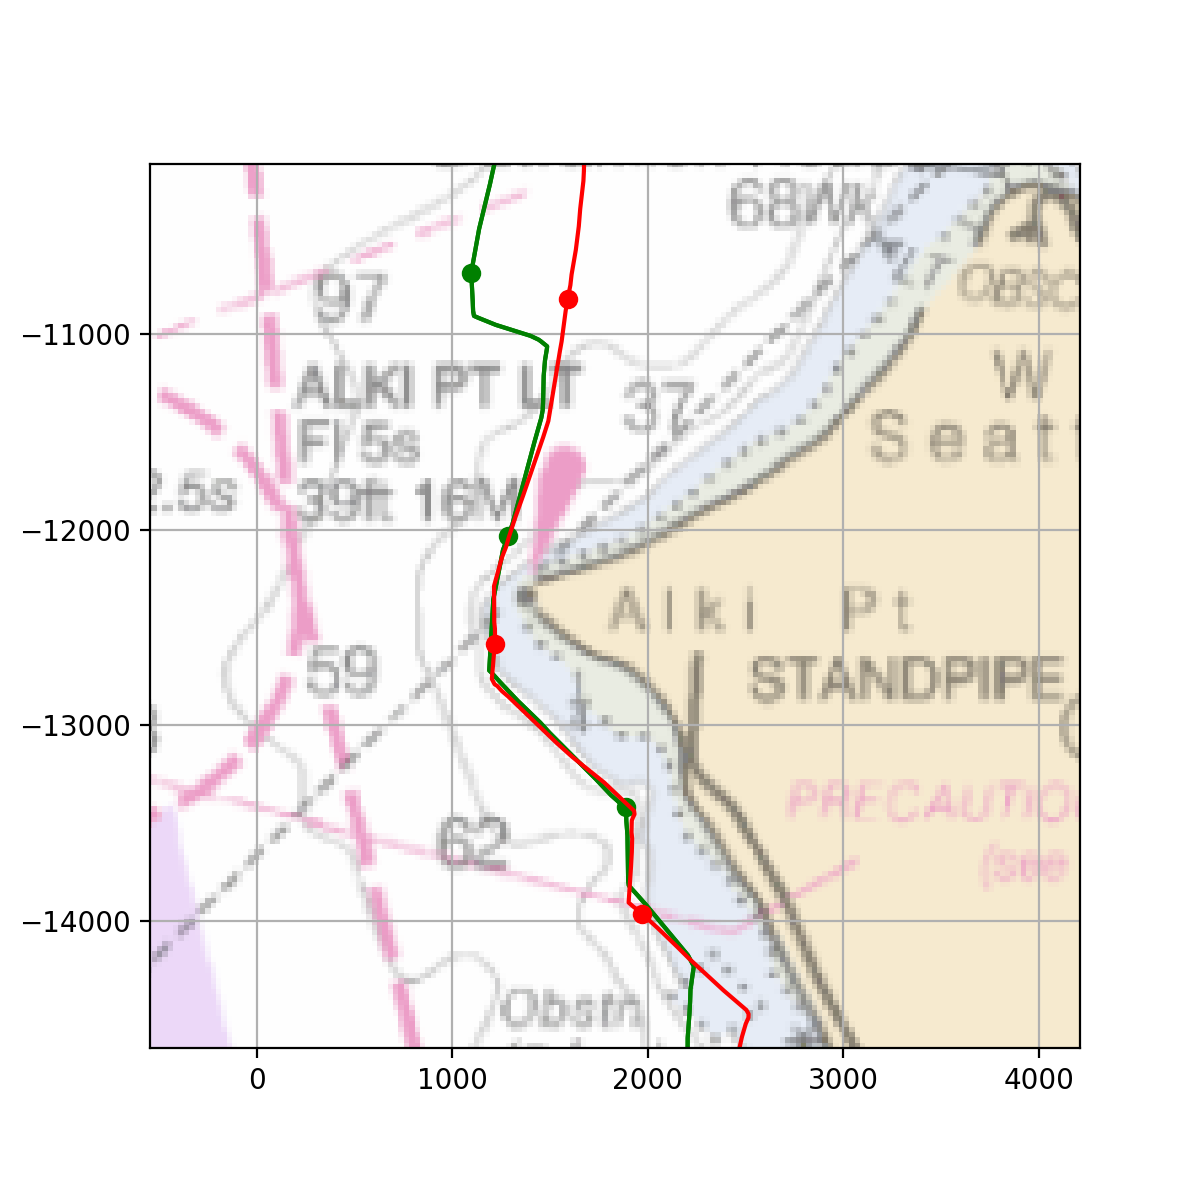

In [28]:
# Select just the boats of interest
df_jubilee = df[df.boat_id == 43409]
df_pg = df[df.boat_id == 43383]

# get started at the same time
basetime = min(df_pg.row_times.iloc[0], df_jubilee.row_times.iloc[0])    

# Fit a spline to deal with sampling issues.
df_jubilee = kw.fit_spline(df_jubilee, basetime=basetime, sample_seconds=1)
df_pg      = kw.fit_spline(df_pg, basetime=basetime, sample_seconds=1)

# Select the time of interest
length = 3 * 60 * 60  # 5 hours
offset = 0 * length  
sl = slice(offset,offset+length)

# Slice down to the time of interst
sdf_jubilee = df_jubilee.iloc[sl]
sdf_pg = df_pg.iloc[sl]    

ch = chart.plot_chart(sdf_pg)
chart.draw_track(sdf_pg, ch, color='green')
chart.draw_track(sdf_pg.iloc[::500], ch, color='green', linestyle = 'None', marker='o')
chart.draw_track(sdf_jubilee, ch, color='red')
chart.draw_track(sdf_jubilee.iloc[::500], ch, color='red', linestyle = 'None', marker='o')

None

In [21]:
import importlib
import tide_prints

In [22]:
importlib.reload(tide_prints)

<module 'tide_prints' from '/Users/viola/GDrive/Sailboat/Code/Python/sailing/tide_prints.py'>

In [40]:

def plot_currents(offset, length, chart_num):
    # Select the time of interest
    hours = 60 * 60
    length = length * hours  
    offset = offset * hours
    sl = slice(offset,offset+length)

    # Slice down to the time of interst
    sdf_jubilee = df_jubilee.iloc[sl]
    sdf_pg = df_pg.iloc[sl]    

    ch = tide_prints.current_chart(sdf_jubilee, chart_num, border=0.1)
    chart.draw_track(sdf_jubilee, ch, color='red')
    chart.draw_track(sdf_pg, ch, color='green')

    display(sdf_jubilee.row_times.min())
    display(sdf_jubilee.row_times.max())

<IPython.core.display.Javascript object>


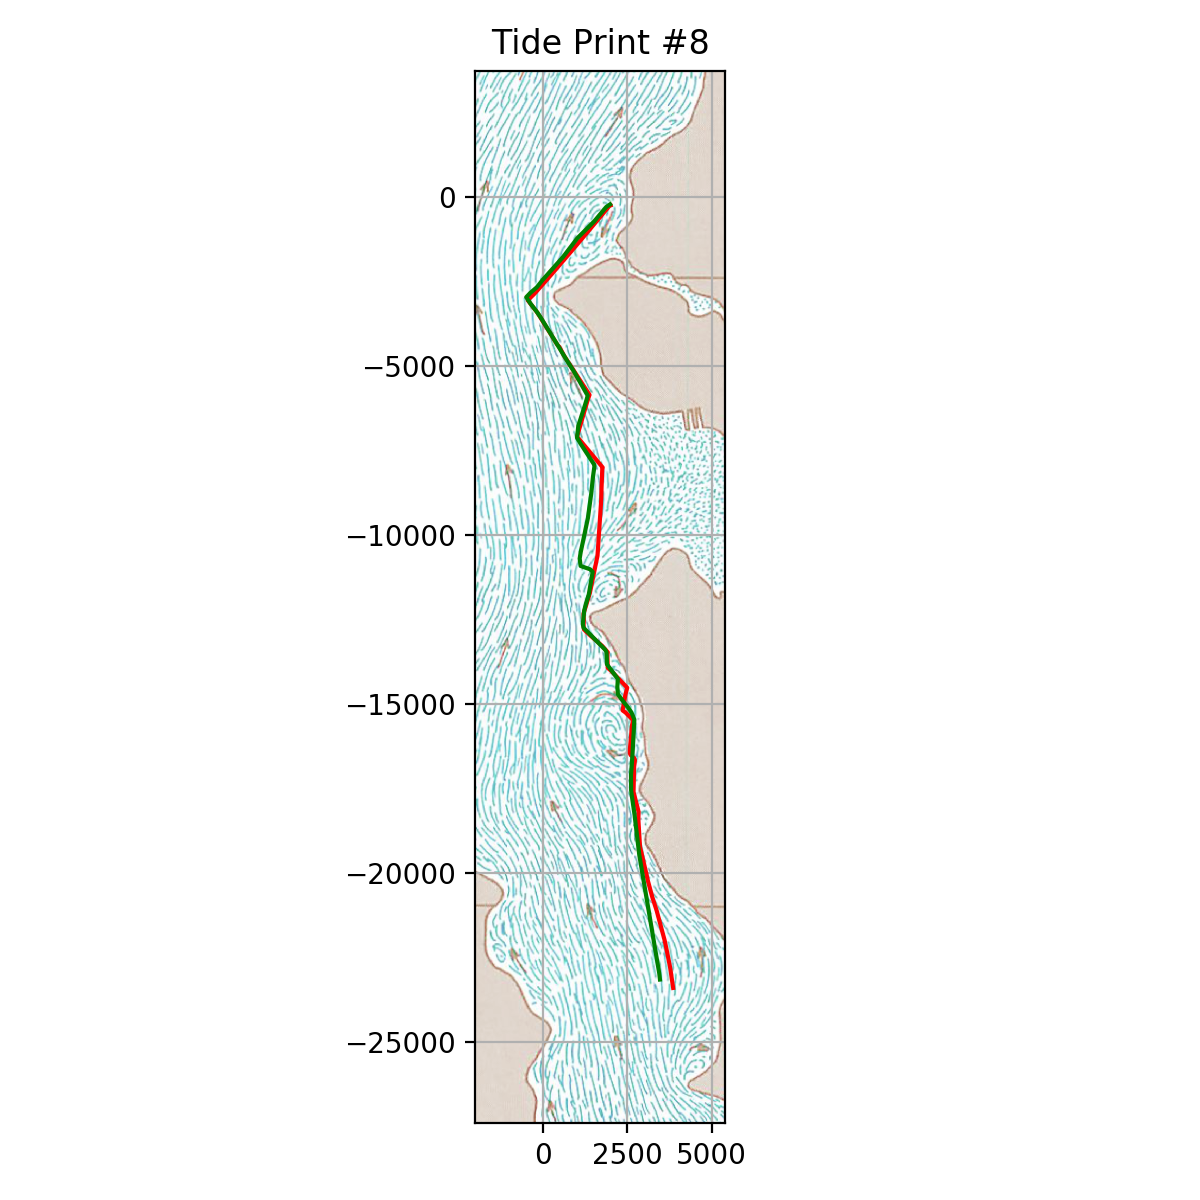

Timestamp('2021-05-29 11:00:02-0700', tz='US/Pacific')

Timestamp('2021-05-29 13:00:01.062494574-0700', tz='US/Pacific')

In [42]:
plot_currents(0, 2, 8)

<IPython.core.display.Javascript object>


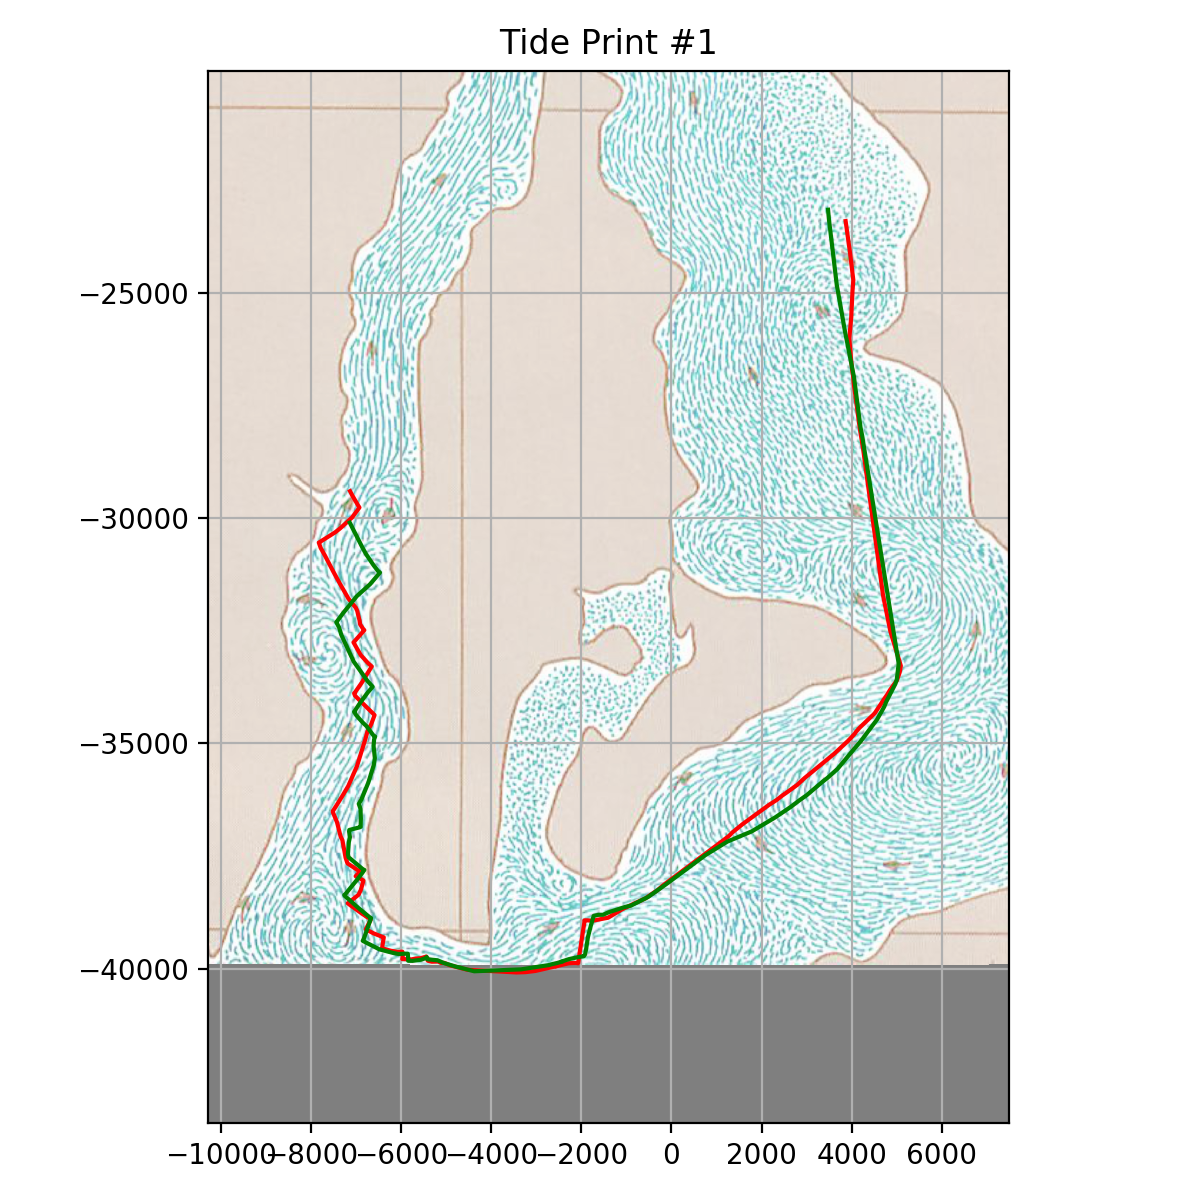

Timestamp('2021-05-29 13:00:02.062503255-0700', tz='US/Pacific')

Timestamp('2021-05-29 16:00:01.156249457-0700', tz='US/Pacific')

In [44]:
plot_currents(2, 3, 1)

<IPython.core.display.Javascript object>


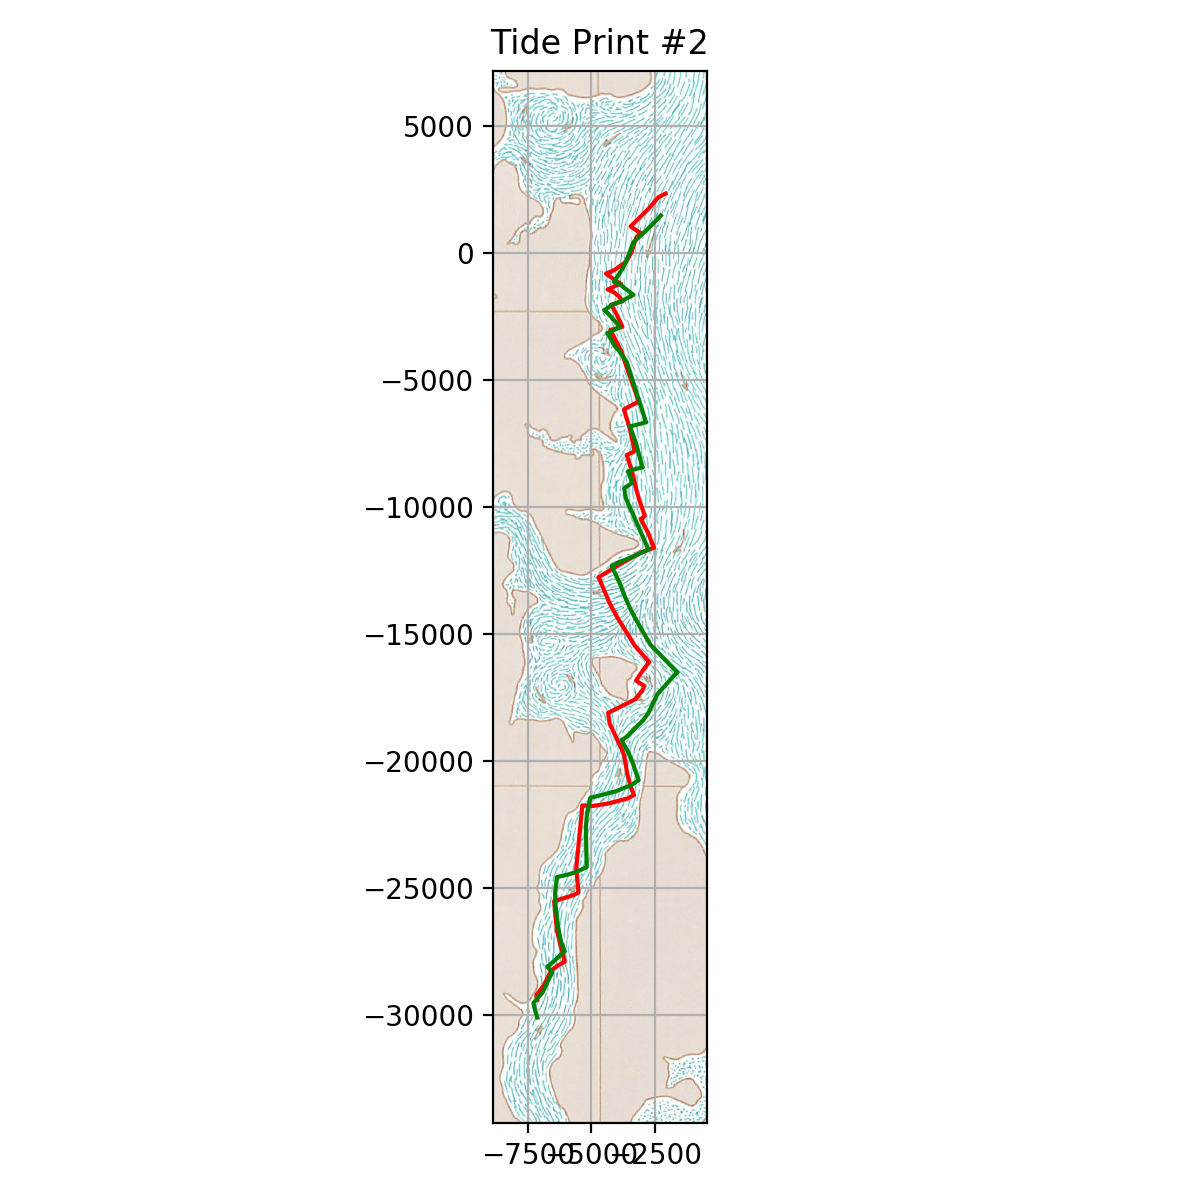

Timestamp('2021-05-29 16:00:02.156258138-0700', tz='US/Pacific')

Timestamp('2021-05-29 20:00:01.281255968-0700', tz='US/Pacific')

In [45]:
plot_currents(5, 4, 2)

<IPython.core.display.Javascript object>


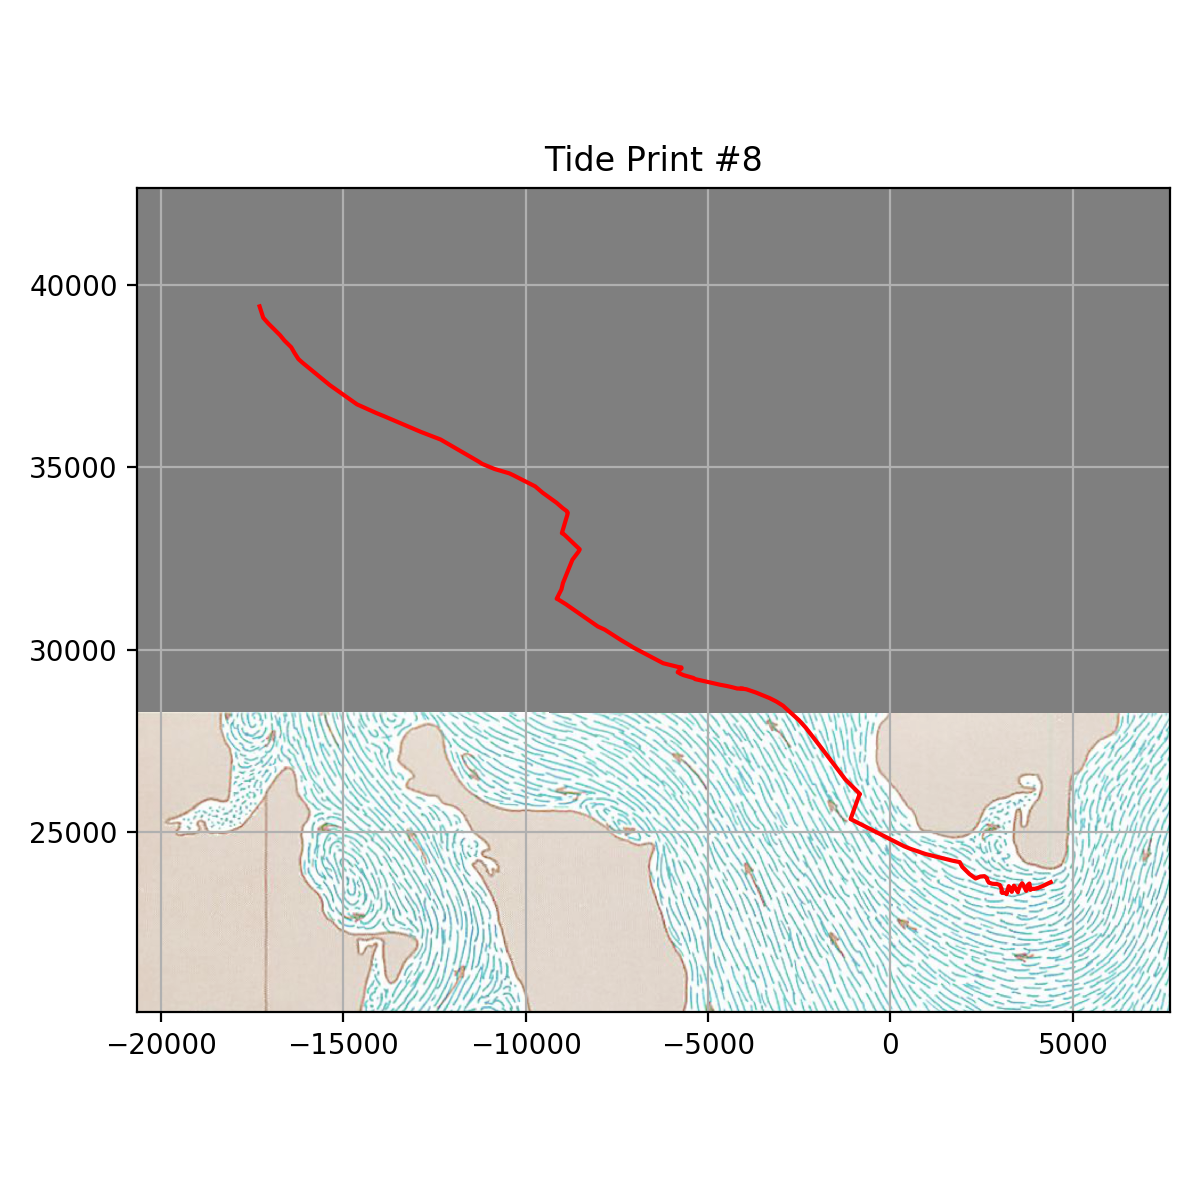

Timestamp('2021-05-30 11:00:02.750039064-0700', tz='US/Pacific')

Timestamp('2021-05-30 15:00:01.875036894-0700', tz='US/Pacific')

In [46]:
plot_currents(24, 4, 8)